In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('/content/datasets/heart-disease.xlsx',
                         header=None, names=column_name)
raw_data.head()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [162]:
print(raw_data.describe())

              age         sex          cp    treshbps         fbs     restecg  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769    0.148515    0.983498   
std      9.038662    0.467299    0.960126   17.599748    0.356198    0.994883   
min     29.000000    0.000000    1.000000   94.000000    0.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000    0.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000    0.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000    0.000000    2.000000   
max     77.000000    1.000000    4.000000  200.000000    1.000000    2.000000   

          thalach       exang     oldpeak       slope  HeartDisease  
count  303.000000  303.000000  303.000000  303.000000    303.000000  
mean   149.607261    0.326733    1.039604    1.600660      0.458746  
std     22.875003    0.469794    1.161075    0.616226      0

# 새 섹션

In [163]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [164]:
clean_data = raw_data.replace('?', np.nan)
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [165]:
keep = column_name.pop()
print(keep)
print(column_name)


HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [166]:
training_data = clean_data[column_name]
target = clean_data[[keep]]
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1       145  233.0    1        2      150      0      2.3   
1   67    1   4       160  286.0    0        0      108      1      1.5   
3   37    1   3       130  250.0    0        0      187      0      3.5   
4   41    0   2       130  204.0    0        2      172      0      1.4   
5   56    1   2       120  236.0    0        0      178      0      0.8   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
3      3  0.0   3.0  
4      1  0.0   3.0  
5      1  0.0   3.0  
   HeartDisease
0             0
1             1
3             0
4             0
5             0


In [167]:
print(target['HeartDisease'].sum())

136


In [168]:
print(target['HeartDisease'].mean())

0.4594594594594595


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data.head())



        age       sex        cp  treshbps      chol       fbs   restecg  \
0  0.942285  0.692820 -2.236793  0.747441 -0.277228  2.425638  1.020526   
1  1.385714  0.692820  0.876486  1.592523  0.742265 -0.412263 -0.993312   
2 -1.939999  0.692820 -0.161274 -0.097641  0.049779 -0.412263 -0.993312   
3 -1.496571 -1.443376 -1.199033 -0.097641 -0.835064 -0.412263  1.020526   
4  0.166286  0.692820 -1.199033 -0.661029 -0.219521 -0.412263 -0.993312   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.014451 -0.692820  1.074839  2.264087 -0.718421  0.660262  
1 -1.818794  1.443376  0.386756  0.645320  2.487397 -0.890830  
2  1.629453 -0.692820  2.106963  2.264087 -0.718421 -0.890830  
3  0.974723 -0.692820  0.300746 -0.973448 -0.718421 -0.890830  
4  1.236615 -0.692820 -0.215316 -0.973448 -0.718421 -0.890830  


In [170]:
print(scaled_data.describe())


                age           sex            cp      treshbps          chol  \
count  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02   
mean   3.000603e-18  6.001206e-18  1.140229e-16  5.911187e-16  1.500301e-17   
std    1.001693e+00  1.001693e+00  1.001693e+00  1.001693e+00  1.001693e+00   
min   -2.826856e+00 -1.443376e+00 -2.236793e+00 -2.125838e+00 -2.335451e+00   
25%   -7.205712e-01 -1.443376e+00 -1.612735e-01 -6.610293e-01 -7.004143e-01   
50%    1.662857e-01  6.928203e-01 -1.612735e-01 -9.764125e-02 -8.487113e-02   
75%    7.205712e-01  6.928203e-01  8.764865e-01  4.657468e-01  5.547167e-01   
max    2.494285e+00  6.928203e-01  8.764865e-01  3.846075e+00  6.089796e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02   
mean   1.200241e-17 -2.400482e-17  6.001206e-16 -9.001808e-18 -1.200241e-17   
std    1.001693e+00  1.001693e+00  1.001693e+00  1.

In [171]:
print(scaled_data.describe().T)

          count          mean       std       min       25%       50%  \
age       296.0  3.000603e-18  1.001693 -2.826856 -0.720571  0.166286   
sex       296.0  6.001206e-18  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.140229e-16  1.001693 -2.236793 -0.161274 -0.161274   
treshbps  296.0  5.911187e-16  1.001693 -2.125838 -0.661029 -0.097641   
chol      296.0  1.500301e-17  1.001693 -2.335451 -0.700414 -0.084871   
fbs       296.0  1.200241e-17  1.001693 -0.412263 -0.412263 -0.412263   
restecg   296.0 -2.400482e-17  1.001693 -0.993312 -0.993312 -0.489853   
thalach   296.0  6.001206e-16  1.001693 -3.433796 -0.694840  0.145397   
exang     296.0 -9.001808e-18  1.001693 -0.692820 -0.692820 -0.692820   
oldpeak   296.0 -1.200241e-17  1.001693 -0.903399 -0.903399 -0.215316   
slope     296.0  4.200844e-17  1.001693 -0.973448 -0.973448  0.645320   
ca        296.0 -1.200241e-17  1.001693 -0.718421 -0.718421 -0.718421   
thal      296.0  5.401085e-17  1.001693 -0.890830 -

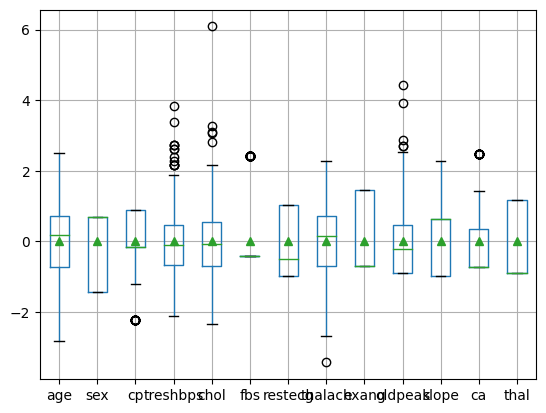

In [172]:
boxplot = scaled_data.boxplot(column = column_name, showmeans = True)
plt.show()

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size = 0.3)
print('X_train shape :', X_train.shape)
print('Y_train shape :', Y_train.shape)
print('X_test shape :', X_test.shape)
print('Y_test shape :', Y_test.shape)



X_train shape : (207, 13)
Y_train shape : (207, 1)
X_test shape : (89, 13)
Y_test shape : (89, 1)


In [174]:
model = Sequential()
model.add(Dense(512, input_dim = 13, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               7168      
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [175]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=50,
    validation_split=0.2, verbose=1)


Epoch 1/50
4/4 [==============================] - 1s 54ms/step - loss: 0.2199 - binary_accuracy: 0.6909 - val_loss: 0.1715 - val_binary_accuracy: 0.8095
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 0.1452 - binary_accuracy: 0.8364 - val_loss: 0.1476 - val_binary_accuracy: 0.7857
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1163 - binary_accuracy: 0.8545 - val_loss: 0.1520 - val_binary_accuracy: 0.8095
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1139 - binary_accuracy: 0.8606 - val_loss: 0.1484 - val_binary_accuracy: 0.7857
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1050 - binary_accuracy: 0.8545 - val_loss: 0.1396 - val_binary_accuracy: 0.7857
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1009 - binary_accuracy: 0.8606 - val_loss: 0.1371 - val_binary_accuracy: 0.7857
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0995 - bi

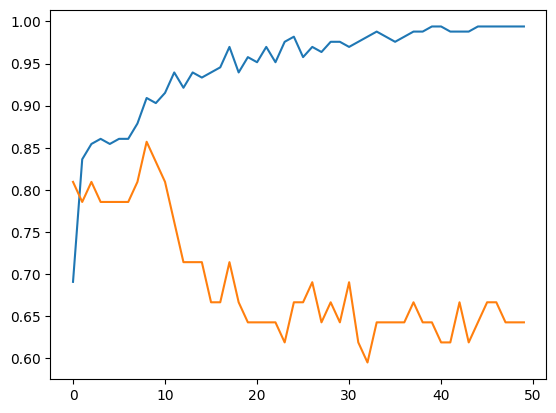

In [176]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()


In [177]:
score = model.evaluate(X_test, Y_test, verbose =0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model loss :', score[1])


Keras DNN model loss : 0.14737802743911743
Keras DNN model loss : 0.8089887499809265
